# Calibration
---------------------------------

This example shows us how to use the calibration method to calibrate a classifier.

The data used is a variation on the Australian weather dataset from [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at a subset of the data
X.sample(frac=1).iloc[:5, :8]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
40667,Williamtown,10.0,20.4,0.0,5.4,NaN,NW,48.0
43490,Wollongong,15.0,22.0,0.4,NaN,NaN,SSW,59.0
102419,Nuriootpa,2.6,23.9,0.0,8.0,12.8,ESE,35.0
123437,SalmonGums,3.4,18.0,0.0,NaN,NaN,WSW,33.0
18121,NorahHead,16.5,22.3,0.0,NaN,NaN,S,46.0


## Run the pipeline

In [3]:
# Initialize the ATOM class
atom = ATOMClassifier(X, 'RainTomorrow', n_rows=1e4, verbose=1, warnings='ignore', random_state=1)

# Handle missing values and categorical columns in the dataset
atom.impute(strat_num='median', strat_cat='most_frequent')
atom.encode(strategy='target', max_onehot=5, frac_to_other=0.05)

# Fit a linear SVM to the data
atom.run('lsvm')

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Applying data cleaning...

Dataset stats ================= >>
Shape: (10000, 22)
Missing values: 22613
Categorical columns: 5
Scaled: False
----------------------------------
Train set size: 8000
Test set size: 2000

Fitting Imputer...
Imputing missing values...
Fitting Encoder...
Encoding categorical columns...

Running pipeline ============================= >>
Models in pipeline: lSVM
Metric: f1


Results for Linear SVM:         
Fitting -----------------------------------------
Score on the train set --> f1: 0.5639
Score on the test set  --> f1: 0.5929
Time elapsed: 0.444s
-------------------------------------------------
Total time: 0.444s


Final results ========================= >>
Duration: 0.444s
------------------------------------------
Linear SVM --> f1: 0.593


## Analyze the results

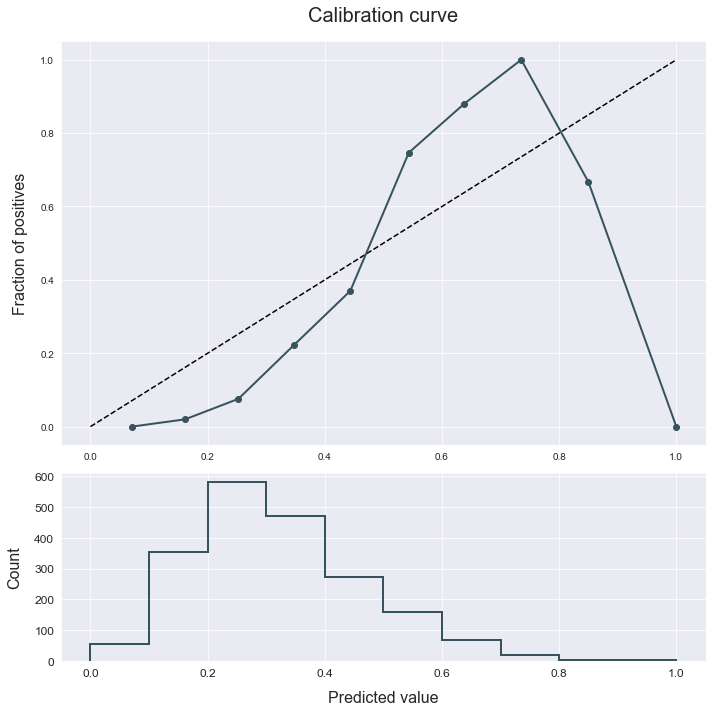

In [4]:
# Check our model's calibration
atom.plot_calibration()

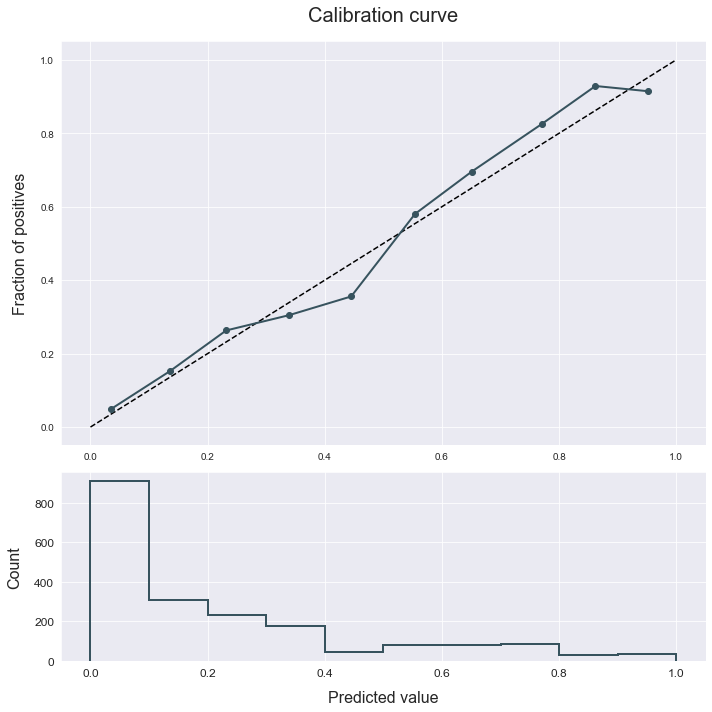

In [5]:
# Let's try to improve it using the calibrate method
atom.calibrate(method='isotonic', cv=5)
atom.plot_calibration()